In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd
%cd drive/My Drive/MLSP/data
%pwd

/content/drive/My Drive/MLSP/data


'/content/drive/My Drive/MLSP/data'

In [3]:
%ls -ltr

total 1513
-rw------- 1 root root 127020 Feb 17 01:16 x.wav
-rw------- 1 root root   8983 Feb 17 01:16 june.mat
-rw------- 1 root root 441436 Feb 17 01:16 december.png
-rw------- 1 root root   8991 Feb 17 01:16 december.mat
-rw------- 1 root root 440382 Feb 17 01:16 june.png
-rw------- 1 root root 392994 Feb 17 01:16 IMG_1878.JPG
-rw------- 1 root root 127020 Feb 23 04:25 output.wav


In [0]:
import cv2 as cv
import numpy as np
import math
import scipy.io
from scipy.io import wavfile
import random
import IPython
from matplotlib import pyplot as plt

# Question No 1: De-beeper

In [5]:
f,X= wavfile.read('x.wav')
X.shape

(63488,)

In [0]:
#X=X/2**15

In [7]:
IPython.display.Audio('x.wav')

In [0]:
N=1600
F_matrix = np.zeros((N,N),dtype=complex)

In [0]:
for f in range(N):
  for n in range(N):
    F_matrix[f,n]=math.e**(-2*1J*(math.pi)*f*(n/N))

In [10]:
F_matrix

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99999229-0.00392698j,
        0.99996916-0.0078539j , ..., 0.99993061+0.0117807j ,
        0.99996916+0.0078539j , 0.99999229+0.00392698j],
       [1.        +0.j        , 0.99996916-0.0078539j ,
        0.99987663-0.01570732j, ..., 0.99972243+0.02355976j,
        0.99987663+0.01570732j, 0.99996916+0.0078539j ],
       ...,
       [1.        +0.j        , 0.99993061+0.0117807j ,
        0.99972243+0.02355976j, ..., 0.9993755 -0.03533556j,
        0.99972243-0.02355976j, 0.99993061-0.0117807j ],
       [1.        +0.j        , 0.99996916+0.0078539j ,
        0.99987663+0.01570732j, ..., 0.99972243-0.02355976j,
        0.99987663-0.01570732j, 0.99996916-0.0078539j ],
       [1.        +0.j        , 0.99999229+0.00392698j,
        0.99996916+0.0078539j , ..., 0.99993061-0.0117807j ,
 

In [11]:
import scipy.linalg
scipy.linalg.dft(1600)

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99999229-0.00392698j,
        0.99996916-0.0078539j , ..., 0.99993061+0.0117807j ,
        0.99996916+0.0078539j , 0.99999229+0.00392698j],
       [1.        +0.j        , 0.99996916-0.0078539j ,
        0.99987663-0.01570732j, ..., 0.99972243+0.02355976j,
        0.99987663+0.01570732j, 0.99996916+0.0078539j ],
       ...,
       [1.        +0.j        , 0.99993061+0.0117807j ,
        0.99972243+0.02355976j, ..., 0.9993755 -0.03533556j,
        0.99972243-0.02355976j, 0.99993061-0.0117807j ],
       [1.        +0.j        , 0.99996916+0.0078539j ,
        0.99987663+0.01570732j, ..., 0.99972243-0.02355976j,
        0.99987663-0.01570732j, 0.99996916-0.0078539j ],
       [1.        +0.j        , 0.99999229+0.00392698j,
        0.99996916+0.0078539j , ..., 0.99993061-0.0117807j ,
 

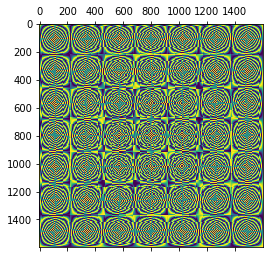

In [12]:
plt.matshow(F_matrix.real)

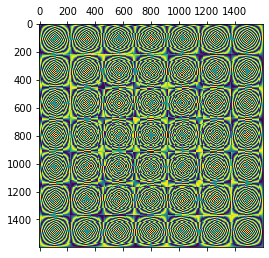

In [13]:
plt.matshow(F_matrix.imag)

In [57]:
#W=np.hanning(N)
#W

array([0.00000000e+00, 3.86013292e-06, 1.54404721e-05, ...,
       1.54404721e-05, 3.86013292e-06, 0.00000000e+00])

In [0]:

W1 = []
for n in range(N):
  # print(n)
  #W[n]=0.5*(1-math.cos(2*math.pi*(n/N)))
  W1.append((math.sin(math.pi*n/N))**2)
  # print(W1[n])
W1 = np.array(W1)
W1

In [0]:
new_X=np.pad(X,(0,512),'constant')

In [0]:
#new_X

In [0]:
#new_X.shape

In [0]:
data_X=[]
data_X = [[0 for x in range(N)] for y in range(int(len(new_X)/int(N/2)))] 

In [0]:
#data_X = []

In [61]:
j=0
for i in range(0,len(new_X),int(N/2)):
  
  if len(new_X[i:i+N])<N:
    #print(j,len(new_X[i:i+N]))
    break
  print(j,i,len(new_X[i:i+N]))
  #print(j,i,len(np.multiply(W,new_X[i:i+N])))
  #print(X[i:i+N])
  data_X[j]=np.multiply(W1,new_X[i:i+N])
  #if j==78:
  #  print(data_X[j])
  
  #data_X.append(np.multiply(W,X[i:i+N]))
  j+=1

0 0 1600
1 800 1600
2 1600 1600
3 2400 1600
4 3200 1600
5 4000 1600
6 4800 1600
7 5600 1600
8 6400 1600
9 7200 1600
10 8000 1600
11 8800 1600
12 9600 1600
13 10400 1600
14 11200 1600
15 12000 1600
16 12800 1600
17 13600 1600
18 14400 1600
19 15200 1600
20 16000 1600
21 16800 1600
22 17600 1600
23 18400 1600
24 19200 1600
25 20000 1600
26 20800 1600
27 21600 1600
28 22400 1600
29 23200 1600
30 24000 1600
31 24800 1600
32 25600 1600
33 26400 1600
34 27200 1600
35 28000 1600
36 28800 1600
37 29600 1600
38 30400 1600
39 31200 1600
40 32000 1600
41 32800 1600
42 33600 1600
43 34400 1600
44 35200 1600
45 36000 1600
46 36800 1600
47 37600 1600
48 38400 1600
49 39200 1600
50 40000 1600
51 40800 1600
52 41600 1600
53 42400 1600
54 43200 1600
55 44000 1600
56 44800 1600
57 45600 1600
58 46400 1600
59 47200 1600
60 48000 1600
61 48800 1600
62 49600 1600
63 50400 1600
64 51200 1600
65 52000 1600
66 52800 1600
67 53600 1600
68 54400 1600
69 55200 1600
70 56000 1600
71 56800 1600
72 57600 1600
73 58

In [0]:
#len(new_X[62400:62400+1600])

In [0]:
data_X  = np.array(data_X)

In [63]:
data_X.shape

(80, 1600)

In [64]:
spectogram=np.matmul(data_X,F_matrix)
spectogram.shape,data_X.shape

((80, 1600), (80, 1600))

In [65]:
spectogram

array([[ 2158.64512146  +0.j        , -1125.2080349  +35.76060091j,
           56.4110615   +2.09309501j, ...,    34.08135645 +92.75282755j,
           56.4110615   -2.09309501j, -1125.2080349  -35.76060091j],
       [ 2264.09688385  +0.j        , -1155.67600136 +95.16678435j,
           35.0736564 -126.77151447j, ...,   -23.40057382 -58.89125253j,
           35.0736564 +126.77151447j, -1155.67600136 -95.16678435j],
       [ 1830.7677455   +0.j        ,  -878.70319159-185.02156024j,
          -65.16903962 +34.68159104j, ...,    47.62448129 -14.05211795j,
          -65.16903962 -34.68159104j,  -878.70319159+185.02156024j],
       ...,
       [ 1421.25435652  +0.j        ,  -642.44695166-211.80723515j,
         -188.43603627  +9.47256288j, ...,   116.95447524-205.72987159j,
         -188.43603627  -9.47256288j,  -642.44695166+211.80723515j],
       [ 1104.95961023  +0.j        ,  -696.98493583-118.96268651j,
          153.94181249 -69.31166299j, ...,   119.27203404 -50.35541498j,
       

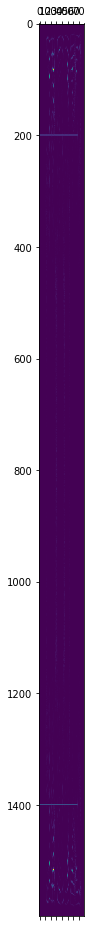

In [66]:
plt.matshow(abs(spectogram.T))

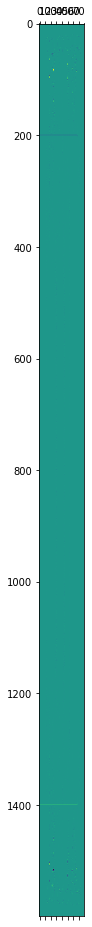

In [67]:
plt.matshow(spectogram.T.real)

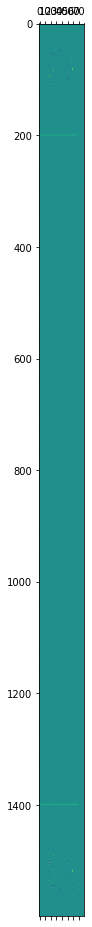

In [68]:
plt.matshow(spectogram.T.imag)

In [0]:
spectogram=spectogram.T
spectogram[199:201,:]=[0]*80
#spectogram[200]=[0]*80
#spectogram[201,:]=np.zeros(80)
spectogram[1399:1402,:]=[0]*80
#spectogram[199]=[0]*80
#spectogram[201]=[0]*80
#spectogram[1400]=[0]*80

In [83]:
spectogram

array([[ 2158.64512146  +0.j        ,  2264.09688385  +0.j        ,
         1830.7677455   +0.j        , ...,  1421.25435652  +0.j        ,
         1104.95961023  +0.j        ,     0.          +0.j        ],
       [-1125.2080349  +35.76060091j, -1155.67600136 +95.16678435j,
         -878.70319159-185.02156024j, ...,  -642.44695166-211.80723515j,
         -696.98493583-118.96268651j,     0.          +0.j        ],
       [   56.4110615   +2.09309501j,    35.0736564 -126.77151447j,
          -65.16903962 +34.68159104j, ...,  -188.43603627  +9.47256288j,
          153.94181249 -69.31166299j,     0.          +0.j        ],
       ...,
       [   34.08135645 +92.75282755j,   -23.40057382 -58.89125253j,
           47.62448129 -14.05211795j, ...,   116.95447524-205.72987159j,
          119.27203404 -50.35541498j,     0.          +0.j        ],
       [   56.4110615   -2.09309501j,    35.0736564 +126.77151447j,
          -65.16903962 -34.68159104j, ...,  -188.43603627  -9.47256288j,
       

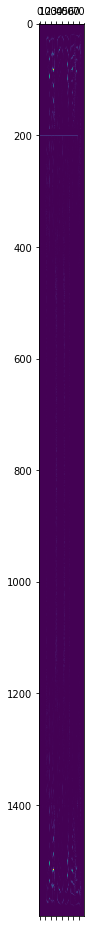

In [84]:
plt.matshow(abs(spectogram))

In [85]:
N=1600
F_star = np.zeros((N,N),dtype=complex)
for f in range(N):
  for n in range(N):
    F_star[f,n]=(math.e**(1J*(2 * math.pi)*f*(n/N)))/N   
F_star     

array([[0.000625  +0.00000000e+00j, 0.000625  +0.00000000e+00j,
        0.000625  +0.00000000e+00j, ..., 0.000625  +0.00000000e+00j,
        0.000625  +0.00000000e+00j, 0.000625  +0.00000000e+00j],
       [0.000625  +0.00000000e+00j, 0.000625  +2.45436295e-06j,
        0.00062498+4.90868806e-06j, ..., 0.00062496-7.36293746e-06j,
        0.00062498-4.90868806e-06j, 0.000625  -2.45436295e-06j],
       [0.000625  +0.00000000e+00j, 0.00062498+4.90868806e-06j,
        0.00062492+9.81707332e-06j, ..., 0.00062483-1.47248530e-05j,
        0.00062492-9.81707332e-06j, 0.00062498-4.90868806e-06j],
       ...,
       [0.000625  +0.00000000e+00j, 0.00062496-7.36293746e-06j,
        0.00062483-1.47248530e-05j, ..., 0.00062461+2.20847249e-05j,
        0.00062483+1.47248530e-05j, 0.00062496+7.36293746e-06j],
       [0.000625  +0.00000000e+00j, 0.00062498-4.90868806e-06j,
        0.00062492-9.81707332e-06j, ..., 0.00062483+1.47248530e-05j,
        0.00062492+9.81707332e-06j, 0.00062498+4.90868805e-06j]

In [86]:
np.linalg.inv(F_matrix)

array([[0.000625  -1.06573685e-16j, 0.000625  -7.92551788e-17j,
        0.000625  -8.66819637e-17j, ..., 0.000625  +4.55635963e-17j,
        0.000625  -4.72630832e-16j, 0.000625  -4.04515831e-16j],
       [0.000625  +5.79506061e-17j, 0.000625  +2.45436295e-06j,
        0.00062498+4.90868806e-06j, ..., 0.00062496-7.36293746e-06j,
        0.00062498-4.90868806e-06j, 0.000625  -2.45436295e-06j],
       [0.000625  -9.42713789e-17j, 0.00062498+4.90868806e-06j,
        0.00062492+9.81707332e-06j, ..., 0.00062483-1.47248530e-05j,
        0.00062492-9.81707332e-06j, 0.00062498-4.90868806e-06j],
       ...,
       [0.000625  +4.84367321e-17j, 0.00062496-7.36293746e-06j,
        0.00062483-1.47248530e-05j, ..., 0.00062461+2.20847249e-05j,
        0.00062483+1.47248530e-05j, 0.00062496+7.36293746e-06j],
       [0.000625  +9.58976822e-17j, 0.00062498-4.90868806e-06j,
        0.00062492-9.81707332e-06j, ..., 0.00062483+1.47248530e-05j,
        0.00062492+9.81707332e-06j, 0.00062498+4.90868806e-06j]

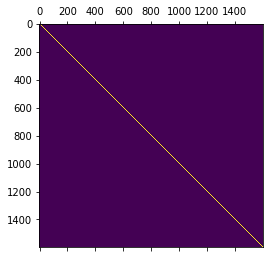

In [87]:
plt.matshow(np.matmul(F_star,F_matrix).real)

In [0]:
X_cap=np.matmul(F_star,spectogram)
X_cap_real=(X_cap.T).real

In [89]:
X_cap_real

array([[-5.78891271e+01, -8.17020568e+01, -5.71995003e+01, ...,
         8.16982377e+01,  5.81061554e+01,  1.53785608e-01],
       [-5.78944819e+01, -8.17378709e+01, -5.72454807e+01, ...,
         8.17370260e+01,  5.81527197e+01,  1.82205624e-01],
       [-5.78962161e+01, -8.17263846e+01, -5.72266859e+01, ...,
         8.17243000e+01,  5.81347297e+01,  1.68548888e-01],
       ...,
       [ 1.10903955e-01,  4.02480441e-02, -5.45082547e-02, ...,
        -3.87553770e-02,  5.44030627e-02,  1.16495875e-01],
       [ 8.02623255e-02,  9.84757149e-02,  6.10832892e-02, ...,
        -9.36145509e-02, -5.36092623e-02,  1.76297188e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [90]:
final_data = [0]*64000
#final_data=[]
j=0

for i in range(0,len(final_data),int(N/2)):
  if len(final_data[i:i+N])<N :
    break

  final_data[i:i+N]=final_data[i:i+N]+X_cap_real[j,:]
  print(i, i+N, len(X_cap_real[j,:]))
  print(j,X_cap_real[:,j].shape)
  j+=1


0 1600 1600
0 (80,)
800 2400 1600
1 (80,)
1600 3200 1600
2 (80,)
2400 4000 1600
3 (80,)
3200 4800 1600
4 (80,)
4000 5600 1600
5 (80,)
4800 6400 1600
6 (80,)
5600 7200 1600
7 (80,)
6400 8000 1600
8 (80,)
7200 8800 1600
9 (80,)
8000 9600 1600
10 (80,)
8800 10400 1600
11 (80,)
9600 11200 1600
12 (80,)
10400 12000 1600
13 (80,)
11200 12800 1600
14 (80,)
12000 13600 1600
15 (80,)
12800 14400 1600
16 (80,)
13600 15200 1600
17 (80,)
14400 16000 1600
18 (80,)
15200 16800 1600
19 (80,)
16000 17600 1600
20 (80,)
16800 18400 1600
21 (80,)
17600 19200 1600
22 (80,)
18400 20000 1600
23 (80,)
19200 20800 1600
24 (80,)
20000 21600 1600
25 (80,)
20800 22400 1600
26 (80,)
21600 23200 1600
27 (80,)
22400 24000 1600
28 (80,)
23200 24800 1600
29 (80,)
24000 25600 1600
30 (80,)
24800 26400 1600
31 (80,)
25600 27200 1600
32 (80,)
26400 28000 1600
33 (80,)
27200 28800 1600
34 (80,)
28000 29600 1600
35 (80,)
28800 30400 1600
36 (80,)
29600 31200 1600
37 (80,)
30400 32000 1600
38 (80,)
31200 32800 1600
39 (80,

In [0]:
final_data=final_data[:63488]

In [92]:
final_data

[-57.88912710063553,
 -81.7020567683293,
 -57.19950029535264,
 1.132182055788552,
 58.79926428404172,
 81.69854580120877,
 56.28490226689347,
 -2.416873294582823,
 -59.69388820500769,
 -81.67393539124981,
 -55.35469344282542,
 3.7026015731490083,
 60.575841946168175,
 81.63160787076976,
 54.41678809383009,
 -4.978472915995339,
 -61.43538779946461,
 -81.56111506703228,
 -53.45335783902651,
 6.264404840083161,
 62.2943570667164,
 81.48028363697975,
 52.499107503285536,
 -7.532889927432676,
 -63.10768229770259,
 -81.36952282410843,
 -51.50030881961809,
 8.836359122702413,
 63.94061959682502,
 81.2639021690291,
 50.517030601892365,
 -10.071127799632361,
 -64.72588348149051,
 -81.0876684278144,
 -49.47945548359611,
 11.37391171105222,
 65.53120694287837,
 80.94785745032057,
 48.502840351117555,
 -12.603313621503387,
 -66.25709276472001,
 -80.71708451797899,
 -47.446784464354856,
 13.926067386342819,
 67.05257268738644,
 80.55651641459609,
 46.416771317479565,
 -15.108177234791222,
 -67.7082

In [93]:
IPython.display.Audio(final_data,rate=16000)

# Question No 2: Parallax

In [96]:
june=scipy.io.loadmat('june.mat')
june=june['june']

december=scipy.io.loadmat('december.mat')
december=december['december']

june.shape,december.shape

((2700, 2), (2700, 2))

In [0]:
disparity=december[:,0]-june[:,0]

In [98]:
disparity.shape

(2700,)

(array([  5.,   2.,  11.,  14.,  30.,  31.,  39.,  47.,  43.,  46.,  43.,
         69., 103., 133., 208., 262., 319., 314., 310., 245., 164., 129.,
         77.,  36.,  11.,   7.,   1.,   0.,   0.,   1.]),
 array([ 5.        ,  7.03333333,  9.06666667, 11.1       , 13.13333333,
        15.16666667, 17.2       , 19.23333333, 21.26666667, 23.3       ,
        25.33333333, 27.36666667, 29.4       , 31.43333333, 33.46666667,
        35.5       , 37.53333333, 39.56666667, 41.6       , 43.63333333,
        45.66666667, 47.7       , 49.73333333, 51.76666667, 53.8       ,
        55.83333333, 57.86666667, 59.9       , 61.93333333, 63.96666667,
        66.        ]),
 <a list of 30 Patch objects>)

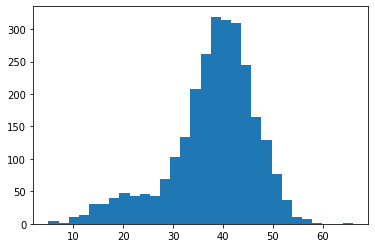

In [99]:
plt.hist(disparity,bins=30)

In [100]:
cluster_idx1=random.randint(0,2700)
cluster_idx2=random.randint(0,2700)
cluster_mean1=disparity[cluster_idx1]
cluster_mean2=disparity[cluster_idx2]
cm1,cm2=cluster_mean1,cluster_mean2
cluster_mean1,cluster_mean2

(45, 23)

In [101]:
for _ in range(5):
  cluster1=[]
  cluster2=[]
  mem1=[]
  mem2=[]
  for i in range(2700):
    d1=abs(cluster_mean1-disparity[i])
    d2=abs(cluster_mean2-disparity[i])
    if d1<d2:
      cluster1.append(disparity[i])
    else:
        cluster2.append(disparity[i])
  #print(len(cluster1),len(cluster2))      
  cluster_mean1=np.mean(cluster1)
  cluster_mean2=np.mean(cluster2)      



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ushort_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ushort_scalars
  import sys


In [102]:
cluster_mean1,cluster_mean2

(27.74271844660194, 42.31183368869936)

In [103]:
for _ in range(5):
  cluster1=[]
  cluster2=[]
  distance1=[]
  distance2=[]
  mem1=[]
  mem2=[]
  s1=0
  s2=0
  for i in range(2700):
    d1=(cm1-disparity[i])**2
    d2=(cm2-disparity[i])**2
    distance1.append(d1)
    distance2.append(d2)
    if d1<d2:
      cluster1.append(disparity[i])
      s1+=disparity[i]
      cluster2.append(0)
      mem1.append(1)
      mem2.append(0)
    else:
        cluster2.append(disparity[i])
        s2+=disparity[i]
        cluster1.append(0)
        mem1.append(0)
        mem2.append(1)    
  cm1=s1/sum(mem1)
  cm2=s2/sum(mem2)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ushort_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ushort_scalars
  # This is added back by InteractiveShellApp.init_path()


In [0]:
membership_matrix=np.zeros(shape =(len(mem1),2))
membership_matrix.shape
membership_matrix[:,0]=mem1
membership_matrix[:,1]=mem2

In [0]:
distance_matrix=np.zeros(shape =(len(distance1),2))
distance_matrix.shape
distance_matrix[:,0]=distance1
distance_matrix[:,1]=distance2

In [0]:
cluster_matrix=np.zeros(shape =(len(cluster1),2))
cluster_matrix.shape
cluster_matrix[:,0]=cluster1
cluster_matrix[:,1]=cluster2

In [107]:
distance_matrix

array([[1.50240951e+02, 5.34457500e+00],
       [2.03270077e+02, 9.72402494e-02],
       [2.03270077e+02, 9.72402494e-02],
       ...,
       [8.56972618e+01, 2.82155771e+01],
       [4.10357456e+02, 3.23552360e+01],
       [1.26726388e+02, 1.09682424e+01]])

In [108]:
cluster_matrix

array([[ 0., 40.],
       [ 0., 42.],
       [ 0., 42.],
       ...,
       [ 0., 37.],
       [ 0., 48.],
       [ 0., 39.]])

In [109]:
k_means = np.array([cm1,cm2])
k_means = k_means.reshape(k_means.shape[0],1)
k_means

array([[27.74271845],
       [42.31183369]])

We are getting 2 means from our k-means algorithm and they are 27 and 42. according to me the 42 is the mean for the stars in my galaxy and 27 is the mean for stars in the far away galaxy. Because as mentioned in the question itself, we will observe higher disparity for things closer to us than things present far away.

# Question No 3: GMM for Parallax

In [119]:
std=np.array([np.std(cluster1),np.std(cluster2)])
std = std.reshape(std.shape[0],1)
std1,std2=np.std(cluster1),np.std(cluster2)
std1,std2

(13.338138023199711, 19.824969260325208)

In [120]:
ini_means=k_means
ini_means1,ini_means2=k_means[0][0],k_means[1][0]
ini_means1,ini_means2

(27.74271844660194, 42.31183368869936)

In [121]:
sum(mem1),sum(mem2)

(824, 1876)

In [122]:
p1 = sum(mem1) / (sum(mem1) + sum(mem2))
p2 = sum(mem2) / (sum(mem1) + sum(mem2))
p1,p2

(0.30518518518518517, 0.6948148148148148)

In [0]:
membership_mat=membership_matrix

In [124]:
disparity=disparity.reshape(disparity.shape[0],1)
membership_mat.shape,disparity.shape

((2700, 2), (2700, 1))

In [0]:
def pdf(num,mean,stand_dev):
  denom = 1 / (stand_dev * np.sqrt(2 * np.pi))
  d = np.exp(-((num - mean)**2/(2*(stand_dev**2))))
  return(d*denom)
  #return (np.exp((-1*(num-mean)**2)/(2*(stand_dev**2))))*(stand_dev*np.sqrt(2*math.pi))

In [0]:
for _ in range(200):
    #E-Step
    for i in range(2700):
      d1=p1*pdf(disparity[i],ini_means1,std1)
      d2=p2*pdf(disparity[i],ini_means2,std2)
      membership_mat[i][0]=d1/(d1+d2)
      membership_mat[i][1]=d2/(d1+d2)
    #M-Step
    sum1 = 0
    sum2 = 0
    counter1 = 0
    counter2 = 0
    for i in range(2700):
      sum1+=membership_mat[i][0] * disparity[i]
      sum2+=membership_mat[i][1] * disparity[i]
      counter1+=membership_mat[i][0]
      counter2+=membership_mat[i][1]

    ini_means1 = sum1/counter1
    ini_means2 = sum2/counter2
    #print(ini_means1, ini_means2)

    p1 = counter1 / 2700
    p2 = counter2 / 2700

    new_sum1 = 0
    new_sum2 = 0
    for i in range(2700):
      new_sum1 = new_sum1 + membership_mat[i][0]*((disparity[i] - ini_means1)**2)
      new_sum2 = new_sum2 + membership_mat[i][1]*((disparity[i] - ini_means2)**2)

    std1 = new_sum1 / counter1
    std1 = np.sqrt(std1)
    std2 = new_sum2 / counter2
    std2 = np.sqrt(std2)


#print(ini_means1, ini_means2)

In [128]:
gmm_means=np.array([ini_means1,ini_means2])
gmm_means

array([[20.85879404],
       [40.15528346]])

In [164]:
std=np.array([std1,std2])
var=std**2
var

array([[34.56465224],
       [34.12059907]])

In [165]:
P=np.array([p1,p2])
P

array([0.11866034, 0.88133966])

In [129]:
"""
for _ in range(10):
    #E-Step
    for i in range(2700):
      d1=np.exp((-1*(ini_means[0][0]-disparity[i][0])**2)/(2*(std[0])**2))
      denom1=1/(std[0]*np.sqrt(2*np.pi))
      d2=np.exp((-1*(ini_means[1][0]-disparity[i][0])**2)/(2*(std[1])**2))
      denom2=1/(std[1]*np.sqrt(2*np.pi))
      d1=d1*denom1
      d2=d2*denom2
      #print(d1,d2)
      membership_mat[i][0]=(d1*p1)/(d1*p1+d2*p2)
      membership_mat[i][1]=(d2*p2)/(d1*p1+d2*p2) 
    #M-Step
    gmm_means=sum(np.multiply(membership_mat,disparity))/sum(membership_mat)

    #P=sum(membership_mat)/(sum(membership_mat[0]) + sum(membership_mat[1]))
    p1=sum(membership_mat[0])/(sum(membership_mat[0]) + sum(membership_mat[1]))
    p2=sum(membership_mat[1])/(sum(membership_mat[0]) + sum(membership_mat[1]))

    var=sum(membership_mat * ((disparity - gmm_means)**2)) / sum(membership_mat)
    #Update step
    ini_means=gmm_means
    #p1,p2=P[0],P[1]
    std=np.sqrt(var)
    print(gmm_means)
  """  

'\nfor _ in range(10):\n    #E-Step\n    for i in range(2700):\n      d1=np.exp((-1*(ini_means[0][0]-disparity[i][0])**2)/(2*(std[0])**2))\n      denom1=1/(std[0]*np.sqrt(2*np.pi))\n      d2=np.exp((-1*(ini_means[1][0]-disparity[i][0])**2)/(2*(std[1])**2))\n      denom2=1/(std[1]*np.sqrt(2*np.pi))\n      d1=d1*denom1\n      d2=d2*denom2\n      #print(d1,d2)\n      membership_mat[i][0]=(d1*p1)/(d1*p1+d2*p2)\n      membership_mat[i][1]=(d2*p2)/(d1*p1+d2*p2) \n    #M-Step\n    gmm_means=sum(np.multiply(membership_mat,disparity))/sum(membership_mat)\n\n    #P=sum(membership_mat)/(sum(membership_mat[0]) + sum(membership_mat[1]))\n    p1=sum(membership_mat[0])/(sum(membership_mat[0]) + sum(membership_mat[1]))\n    p2=sum(membership_mat[1])/(sum(membership_mat[0]) + sum(membership_mat[1]))\n\n    var=sum(membership_mat * ((disparity - gmm_means)**2)) / sum(membership_mat)\n    #Update step\n    ini_means=gmm_means\n    #p1,p2=P[0],P[1]\n    std=np.sqrt(var)\n    print(gmm_means)\n  '

I got 20 and 40 as my gmm means and varince is around 34 for both. My final prior weights are 0.11866034, 0.88133966. I prefer GMM over Kmeans becoz if I look at the histogram I can sence that the means are around 20 and 40 which is perfectly caught by GMM.

Also Kmeans clusters sometimes may converge to same means if not carefully implemented. Also, the covariance matrix is a diagonal matrix in Kmeans which doesn't able to catch the off-diagonal elements like GMM. 



# Question No 4: DCT and PCA

In [130]:
image = cv.imread('IMG_1878.JPG')
image.shape

(1024, 768, 3)

In [131]:
XR=image[:,:,0]
XG=image[:,:,1]
XB=image[:,:,2]
XR.shape,XG.shape,XB.shape

((1024, 768), (1024, 768), (1024, 768))

In [0]:
r_idx1=random.randint(0,1016)
r_idx2=random.randint(0,1016)
r_idx3=random.randint(0,1016)

In [133]:
XR1=XR[r_idx1:r_idx1+8,:]
XR2=XR[r_idx2:r_idx2+8,:]
XR3=XR[r_idx3:r_idx3+8,:]
XR1.shape,XR2.shape,XR3.shape

((8, 768), (8, 768), (8, 768))

In [134]:
g_idx1=random.randint(0,1016)
g_idx2=random.randint(0,1016)
g_idx3=random.randint(0,1016)
XG1=XG[g_idx1:g_idx1+8,:]
XG2=XG[g_idx2:g_idx2+8,:]
XG3=XG[g_idx3:g_idx3+8,:]
XG1.shape,XG2.shape,XG3.shape

((8, 768), (8, 768), (8, 768))

In [135]:
b_idx1=random.randint(0,1016)
b_idx2=random.randint(0,1016)
b_idx3=random.randint(0,1016)
XB1=XB[b_idx1:b_idx1+8,:]
XB2=XB[b_idx2:b_idx2+8,:]
XB3=XB[b_idx3:b_idx3+8,:]
XB1.shape,XB2.shape,XB3.shape

((8, 768), (8, 768), (8, 768))

In [136]:
R=np.hstack((XR1,XR2,XR3,XG1,XG2,XG3,XB1,XB2,XB3))
R.shape

(8, 6912)

In [0]:
R=R-np.mean(R)

In [138]:
Covarience_mat=np.cov(R)
Covarience_mat.shape

(8, 8)

In [139]:
W1=np.linalg.eig(Covarience_mat)
W=W1[1]
W.shape,R.shape

((8, 8), (8, 6912))

In [0]:
final=np.matmul(np.transpose(W),R)

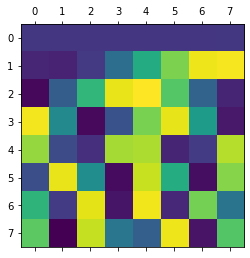

In [166]:
plt.matshow(W.T)

In [142]:

b_idx1=random.randint(0,1016)
b_idx2=random.randint(0,1016)
b_idx3=random.randint(0,1016)
XB1=XB[b_idx1:b_idx1+8,:]
XB2=XB[b_idx2:b_idx2+8,:]
XB3=XB[b_idx3:b_idx3+8,:]
XB1.shape,XB2.shape,XB3.shape

((8, 768), (8, 768), (8, 768))

In [0]:
R_30=[]
G_30=[]
B_30=[]
for _ in range(30):
  r=random.randint(0,1016)
  xr=XR[r:r+8,:]
  R_30.append(xr)
  g=random.randint(0,1016)
  xg=XG[g:g+8,:]
  G_30.append(xg)
  b=random.randint(0,1016)
  xb=XB[b:b+8,:]
  B_30.append(xb)



In [144]:
R_30[0].shape,G_30[0].shape,B_30[0].shape

((8, 768), (8, 768), (8, 768))

In [145]:
R_new=np.hstack((R_30,G_30,B_30))
R_new.shape

(30, 24, 768)

In [0]:
R_new=R_30[0]
G_new=G_30[0]
B_new=B_30[0]
for i in range(1,30):
  R_new=np.hstack((R_new,R_30[i]))
  G_new=np.hstack((G_new,G_30[i]))
  B_new=np.hstack((B_new,B_30[i]))

In [147]:
new_R=np.hstack((R_new,G_new,B_new))
new_R.shape

(8, 69120)

In [148]:
new_R=new_R-np.mean(new_R)
Covarience_mat_new=np.cov(new_R)
Covarience_mat_new.shape

(8, 8)

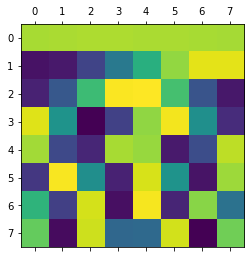

In [167]:
W1_new=np.linalg.eig(Covarience_mat_new)
W_new=W1_new[1]
plt.matshow(W_new.T)

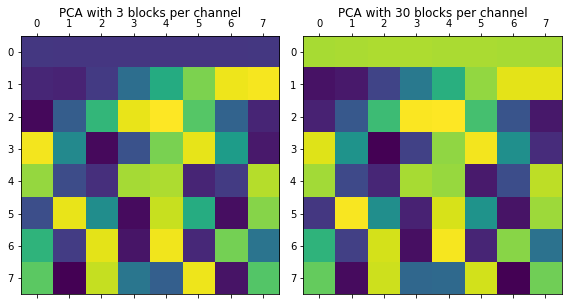

In [168]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(W.shape[0],W.shape[1] ))
axes[0].matshow(W.T)
axes[1].matshow(W_new.T)
axes[0].set_title('PCA with 3 blocks per channel')
axes[1].set_title('PCA with 30 blocks per channel')
fig.tight_layout()



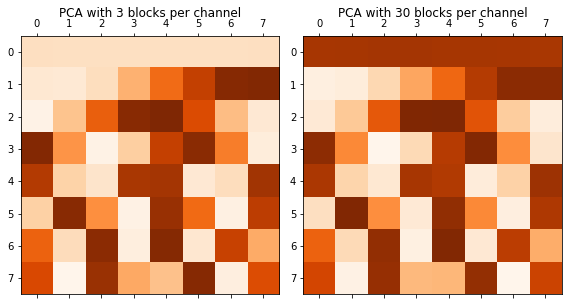

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(W.shape[0],W.shape[1] ))
axes[0].matshow(W.T,cmap='Oranges')
axes[1].matshow(W_new.T,cmap='Oranges')
axes[0].set_title('PCA with 3 blocks per channel')
axes[1].set_title('PCA with 30 blocks per channel')
fig.tight_layout()

I see the plots are looking somewhat similar to the DCT matrix shown in the slides. I can see for the colors are more saturated for PCA with 30 blocks per channel.